# Churn Predict 

## Import the librarys

In [ ]:
# Let's start putting the data into colab environment
from google.colab import files
files.upload()

Saving churn.csv to churn.csv


{'churn.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,34,10,0,2,

In [1]:
# library and Data Manipulation
import pandas as pd
import numpy as np 
from pprint import pprint

# Visualization libraries 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly
import plotly.express as px 
import matplotlib.gridspec as gridspec

# Avoiding unnecessary messages
import warnings
warnings.filterwarnings("ignore")

## Reading the Data

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5780,5781,15590327,Liao,604,Germany,Female,42,10,166031.45,1,1,0,98293.14,0
1265,1266,15662291,Davidson,534,France,Female,55,8,116973.26,3,1,0,122066.50,1
2427,2428,15661821,Johnstone,798,Germany,Female,49,5,132571.67,1,1,1,31686.33,1
8593,8594,15722037,Alvarez,610,Germany,Male,36,7,115462.02,1,0,1,42581.04,0
6855,6856,15737814,Lo,622,France,Male,41,2,127087.06,1,1,0,102402.91,1


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Check values of the dataset  

In [8]:
# Verifying the missing data
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Check the duplicated data 
df.duplicated().sum()

0

In [10]:
# Check the quantity of zero values at the dataframe 
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column', column_name, ' is : ', count)

Count of zeros in column RowNumber  is :  0
Count of zeros in column CustomerId  is :  0
Count of zeros in column Surname  is :  0
Count of zeros in column CreditScore  is :  0
Count of zeros in column Geography  is :  0
Count of zeros in column Gender  is :  0
Count of zeros in column Age  is :  0
Count of zeros in column Tenure  is :  413
Count of zeros in column Balance  is :  3617
Count of zeros in column NumOfProducts  is :  0
Count of zeros in column HasCrCard  is :  2945
Count of zeros in column IsActiveMember  is :  4849
Count of zeros in column EstimatedSalary  is :  0
Count of zeros in column Exited  is :  7963


In [11]:
pd.DataFrame(df[df == 0].count(axis=0)/len(df.index)*100)

,0
RowNumber,0.00
CustomerId,0.00
Surname,0.00
CreditScore,0.00
Geography,0.00
Gender,0.00
Age,0.00
Tenure,4.13
Balance,36.17
NumOfProducts,0.00


<h3> Split and Analysis </h3>
After check the dataset as all, it's necessary to drop unecessaty columns and split the data according with data type. 

In [12]:
pprint(set(df['Surname']))

{'Abazu',
 'Abbie',
 'Abbott',
 'Abdullah',
 'Abdulov',
 'Abel',
 'Abernathy',
 'Abramov',
 'Abramova',
 'Abramovich',
 'Abramowitz',
 'Abrego',
 'Abron',
 'Achebe',
 'Adams',
 'Adamson',
 'Afamefula',
 'Afamefuna',
 'Afanasyev',
 'Afanasyeva',
 'Agafonova',
 'Aguirre',
 'Ah Mouy',
 'Ahern',
 'Ahmed',
 'Aiken',
 'Aikenhead',
 'Ainsworth',
 'Aitken',
 'Ajuluchukwu',
 'Akabueze',
 'Akeroyd',
 'Akhtar',
 'Akobundu',
 'Aksakova',
 'Aksenov',
 'Aksenova',
 'Aksyonov',
 'Aksyonova',
 'Akubundu',
 'Akudinobi',
 'Alaniz',
 'Alderete',
 'Aldrich',
 'Aldridge',
 'Aleksandrova',
 'Alekseeva',
 'Alekseyeva',
 'Aleshire',
 'Alexander',
 'Alexandrov',
 'Alexandrova',
 'Alexeeva',
 'Alexeieva',
 'Alexeyeva',
 'Algarin',
 'Algeranoff',
 'Ali',
 'Aliyev',
 'Aliyeva',
 'Allan',
 'Allard',
 'Allardyce',
 'Allen',
 'Alley',
 'Alleyne',
 'Allingham',
 'Allnutt',
 'Allsop',
 'Alvares',
 'Alvarez',
 'Amadi',
 'Amaechi',
 'Amechi',
 'Amies',
 'Amos',
 'Ampt',
 'Anayochukwu',
 'Anayolisa',
 'Andersen',
 'Ander

In [13]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [14]:
# get only the numerical data
df_num = df.select_dtypes(include='number')

In [15]:
df_num.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
df_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Verifying the distribuction of the numerical data
df_num.describe(percentiles =[0.01, 0.1, 1,.35, .25, .75, .90, .99])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
1%,432.000000,21.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1842.825300,0.000000
10%,521.000000,27.000000,1.000000,0.000000,1.000000,0.00000,0.000000,20273.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
35%,613.000000,34.000000,3.000000,0.000000,1.000000,1.00000,0.000000,70659.728000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [18]:
df_obj = df.select_dtypes(include='object')

In [19]:
df_obj.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [20]:
df_obj.describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


<font color = blue><h1> A few comments after proceed </h1> </color>

There is no missing data at the dataset. But there are a few columns which will be very interesting to drop out. 


# First Data Analysis

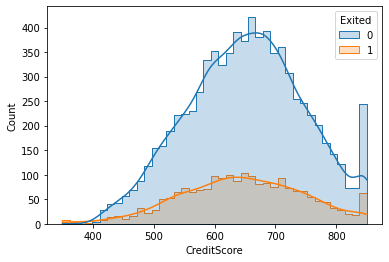

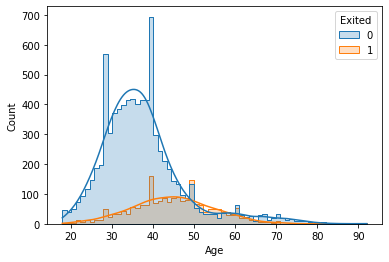

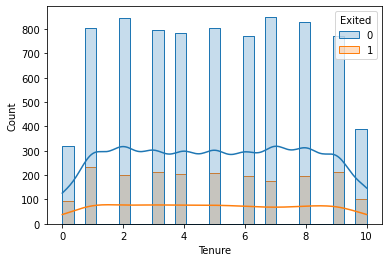

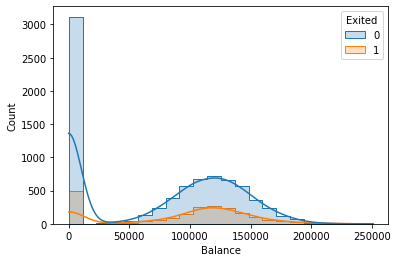

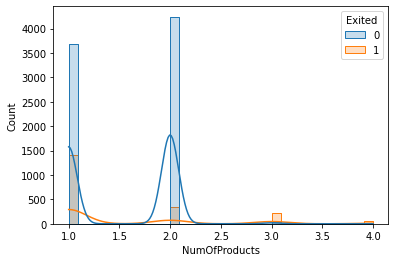

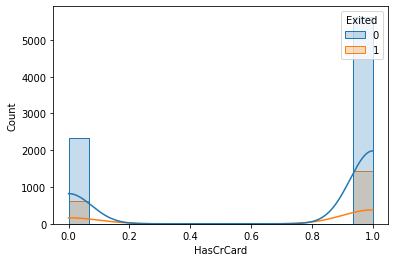

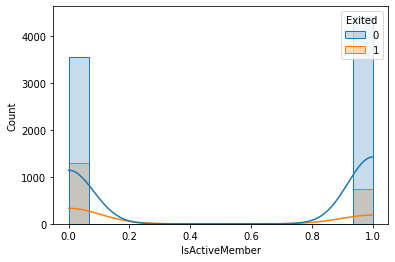

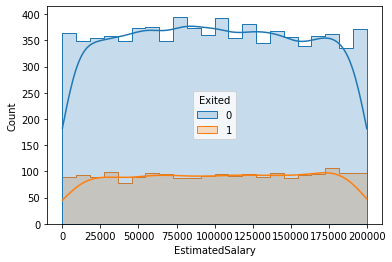

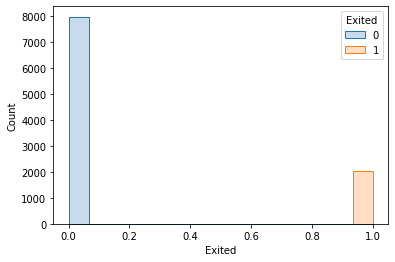

<Figure size 432x288 with 0 Axes>

In [21]:
for i in df_num:
    sns.histplot(x=i,data=df, hue='Exited',kde=True, element="step")  
    plt.figure()

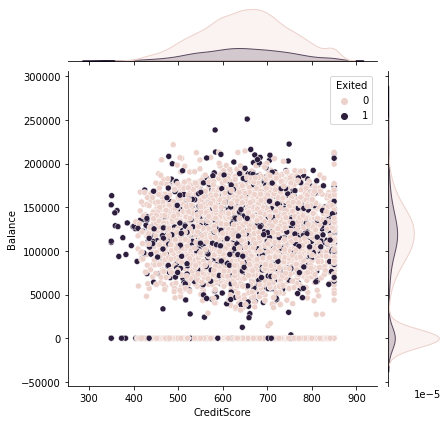

In [22]:
# Going futher with sns.joinplot
sns.jointplot(data=df, x="CreditScore", y="Balance", hue="Exited", kind="scatter", hue_norm=(0., 0.9))
# The code above it's just a example, it's necessary adapted it

Now check the outliers

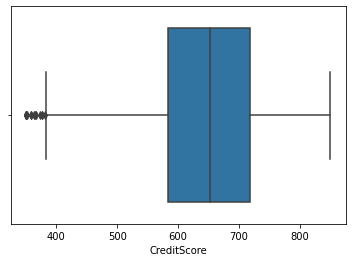

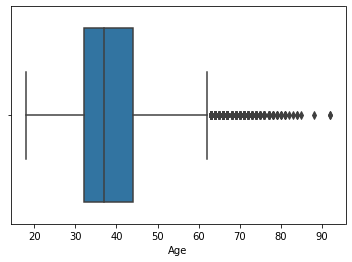

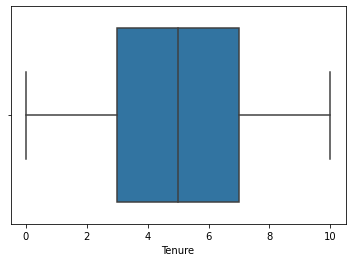

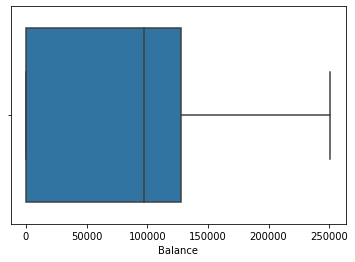

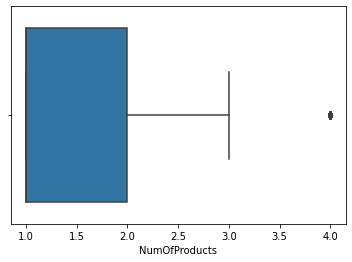

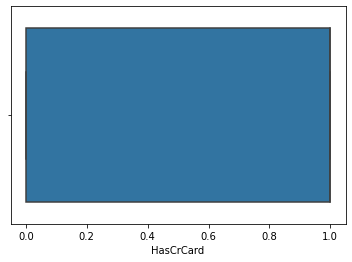

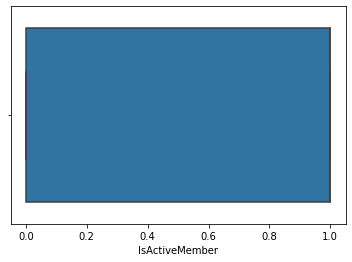

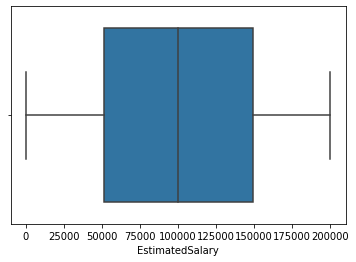

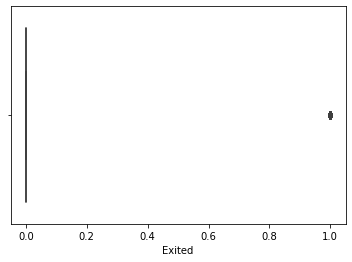

<Figure size 432x288 with 0 Axes>

In [23]:
for i in df_num:
    sns.boxplot(data=df,x = i,  orient="h",)
    plt.figure()

The dataset looks complete in all filds fill with data. So we must look a bit about the dataset deeper.

At column of Balance there is a few values fill with zero. let's find out?

In [24]:
#Dummie code
df.value_counts(['Balance'])

Balance  
0.00         3617
130170.82       2
105473.74       2
133776.86       1
132187.73       1
             ... 
107135.04       1
107106.33       1
107104.50       1
107073.27       1
250898.09       1
Length: 6382, dtype: int64

In [25]:
#Still dummie code, but with percentage
df['Balance'].value_counts(normalize=True)*100

0.00         36.17
130170.82     0.02
105473.74     0.02
85304.27      0.01
159397.75     0.01
             ...  
81556.89      0.01
112687.69     0.01
108698.96     0.01
238387.56     0.01
130142.79     0.01
Name: Balance, Length: 6382, dtype: float64

De 8.000 dados existentes na coluna de Balance 2918, que de acordo com o Código representa 36,4% do dataset. 
There ir 8.000 data at column of Balance, but 36,4% is null. 

In [26]:
df["Balance"].describe(percentiles=[.01, .1, .25, .5, .75, .9, .999])

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
1%            0.000000
10%           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
90%      149244.792000
99.9%    212314.408940
max      250898.090000
Name: Balance, dtype: float64

### Analysis road map 

#### Analysis each feature  apart: 
- Which gender is more frequent at the dataset?
- What is the proportion of people who left and stayed
- What is the most frequent age in the training set?
- What is the average income in the training set?
- How many products do customers have on average?
- How many different countries do we have customers?

In [27]:
# What is the gender most frequent at the data
data_exited = df.value_counts(['Exited'])
data_exited

Exited
0         7963
1         2037
dtype: int64

In [28]:
# plotar gráfico de pizza
fig = px.pie(df, values=data_exited, title="Proportion of Exited and Costumers", names=["Costumers", "Exited"],color_discrete_sequence=["#001C37", "#E2E1FA"]) 
fig.show()

In [29]:
# Qual a proporção entre as pessoas que saíram e ficaram (Exited 1 e 0)
data1 = df['Exited'].value_counts(normalize=True)*100
data1

0    79.63
1    20.37
Name: Exited, dtype: float64

In [30]:
# Qual a idade mais frequente no conjunto de treinamento? = moda
df['Age'].mode()

0    37
dtype: int64

In [31]:
# Qual a renda media no conjunto de treimento?
df['EstimatedSalary'].mean()

100090.2398809998

In [32]:
# Quantos produtos os clientes tem em média?
df['NumOfProducts'].mean()

1.5302

That column is really interesting! ['NumOfProdcuts']

In [33]:
fig = px.histogram(df, x=['NumOfProducts'],
              title='Number Of Products by Exited rate', color=df['Exited'], color_discrete_sequence=["#0077E6",  "#001C37"])
fig.update_xaxes(title_text='Number Of Products')
fig.update_yaxes(title_text='Quantity of clients')
fig.update_layout(legend_title_text="Exited rate")
fig.show()

In [34]:
print(set(df['Geography']))

{'Germany', 'France', 'Spain'}


In [35]:
# Quantos países diferentes temos clientes?
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

#### Analisar varíaveis com relação as outras variáveis
- Pessoas mais velhas tem remuneração média maior maior?
- Pessoas mais velhas tem maior tendencia a ter cartão de credito? 
- Existe algum país com remuneração média maior? 
- ...

In [36]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


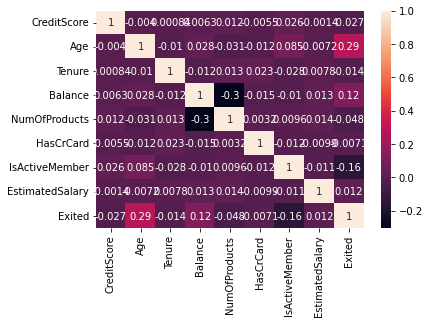

In [37]:
# plot um gráfico heatmap aqui!
sns.heatmap(df.corr(), annot= True)
#sns.set(rc={'figure.figsize':(20,20)})

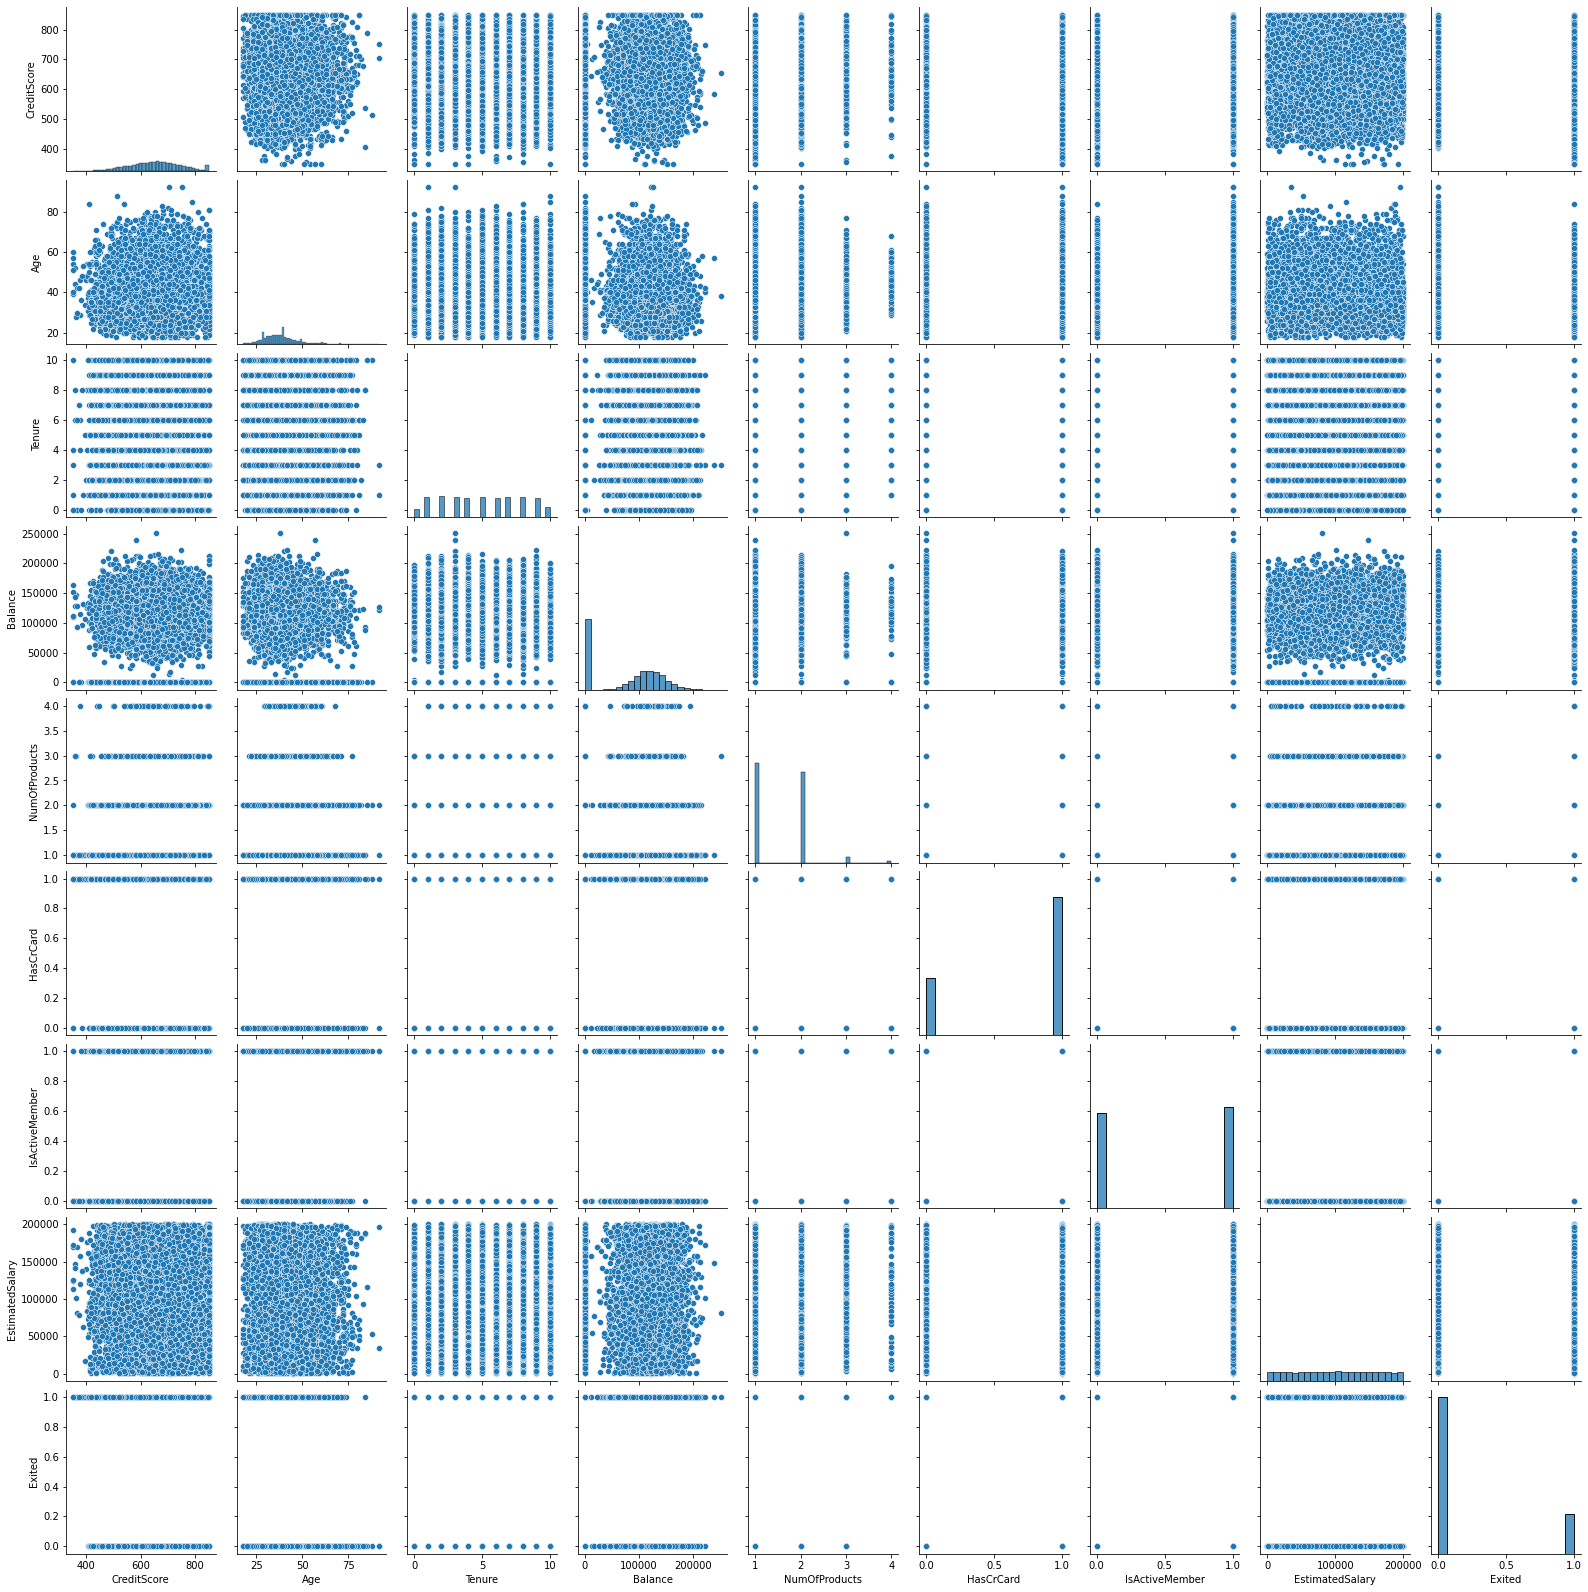

In [38]:
sns.pairplot(df) 

In [39]:
df['AgeGroup'] = df['Age'].apply(lambda x: 1 if x >=55  else 0)

In [40]:
df.groupby(['AgeGroup']).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
AgeGroup,,,,,,,,,
0,650.375850,36.622505,5.016670,76299.242610,1.532354,0.705308,0.494845,100522.988415,0.185896
1,652.109977,62.691610,4.972789,78415.418095,1.507937,0.707483,0.724490,95616.542449,0.387755


In [41]:
# Pessoas mais velhas tem remuneração média maior maior?  S/N 
# 1. Criar coluna e agrupar os clientes por idadae e depois executar .mean() em cada categoria
df["AgeCategory"] = 'Adult'
df.loc[df['Age'] >= 55, 'AgeCategory'] ='Senior'
df.loc[df['Age'] <= 25, 'AgeCategory'] = 'Young'
df['AgeCategory'].value_counts()

Adult     8507
Senior     882
Young      611
Name: AgeCategory, dtype: int64

In [42]:
fig = px.histogram(df, x=['Age'],
              title ='Age range by Exited rate', color=df['Exited'], color_discrete_sequence=["#0077E6",  "#001C37"])
fig.update_xaxes(title_text= 'Age')
fig.update_yaxes(title_text='Quantity of clients')
fig.update_layout(legend_title_text="Exited rate")
fig.show()

In [43]:
df.value_counts(['AgeCategory'])

AgeCategory
Adult          8507
Senior          882
Young           611
dtype: int64

In [44]:
# 2. pessoas mais velhas tendem a ter uma méida maior? 
df.groupby('AgeCategory')['EstimatedSalary'].mean()

AgeCategory
Adult     100410.160699
Senior     95616.542449
Young     102093.897381
Name: EstimatedSalary, dtype: float64

In [45]:
# Pessoas mais velhas tem maior tendencia a ter cartão de credito? S/N
df.groupby('AgeCategory')['HasCrCard'].mean()*100

AgeCategory
Adult     70.588927
Senior    70.748299
Young     69.721768
Name: HasCrCard, dtype: float64

In [46]:
# Existe algum país com remuneração média maior? — Group by mean Geography
# df.groupby('A')['B'].mean()
df.groupby('Geography')['EstimatedSalary'].mean()

Geography
France      99899.180814
Germany    101113.435102
Spain       99440.572281
Name: EstimatedSalary, dtype: float64

# Analysing each variable with correlation with the target: 
- There is any age range with more proportion to leave the bank?
- Which gender has more rate to leave? 
- There is any country which is more rate to churn? 
- ...

> * Target = Exited* <br>


In [47]:
# There is any age range with more proportion to leave the bank?
#df.groupby('AgeCategory')['Exited'].mean()*100

In [48]:
# Which gender has more rate to leave?
df.groupby('Gender')["Exited"].mean()*100

Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64

In [49]:
# There is any country which is more rate to churn?
df.groupby('Geography')["Exited"].mean()*100

Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

In [50]:
# Analysing the product to each column with Exited
df.groupby('NumOfProducts')['Exited'].mean()*100

NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: Exited, dtype: float64

In [51]:
df["CreditScore"].describe(percentiles=[.001, .01, .1, .25,.35, .5, .75, .9, .999])

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
0.1%       366.998000
1%         432.000000
10%        521.000000
25%        584.000000
35%        613.000000
50%        652.000000
75%        718.000000
90%        778.000000
99.9%      850.000000
max        850.000000
Name: CreditScore, dtype: float64

In [52]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'AgeGroup', 'AgeCategory'],
      dtype='object')

# Dealing which every column

## Data Construction

In [53]:
df['Gender']= df['Gender'].map({'Male':0, 'Female':1})
#df['AgeCategory']= df['AgeCategory'].map({'Adult':0, 'Senior':1, 'Young':2})

In [54]:
Products = pd.get_dummies(df.NumOfProducts)

In [55]:
Geo = pd.get_dummies(df.Geography)

In [56]:
df = pd.concat([df, Products, Geo], axis=1)

In [57]:
df.columns

Index([    'CreditScore',       'Geography',          'Gender',
                   'Age',          'Tenure',         'Balance',
         'NumOfProducts',       'HasCrCard',  'IsActiveMember',
       'EstimatedSalary',          'Exited',        'AgeGroup',
           'AgeCategory',                 1,                 2,
                       3,                 4,          'France',
               'Germany',           'Spain'],
      dtype='object')

In [58]:
df1 = df[["CreditScore", "Gender","Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", 
          "EstimatedSalary",1	,2	,3,	4,	'France',	'Germany'	,'Spain', "Exited"]] #"AgeCategory"
df1.head()

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,1,2,3,4,France,Germany,Spain,Exited
0,619,1,2,0.00,1,1,1,101348.88,1,0,0,0,1,0,0,1
1,608,1,1,83807.86,1,0,1,112542.58,1,0,0,0,0,0,1,0
2,502,1,8,159660.80,3,1,0,113931.57,0,0,1,0,1,0,0,1
3,699,1,1,0.00,2,0,0,93826.63,0,1,0,0,1,0,0,0
4,850,1,2,125510.82,1,1,1,79084.10,1,0,0,0,0,0,1,0


# Verifying the version of each packpage
 Don't forget to use the code <br>
 `pip install -r requirements.txt`


In [59]:
! pip freeze

absl-py==1.0.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.0
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.10.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.4
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.22.4
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.28
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed=

# Developing a small pipeline to the others files

In [ ]:
%%writefile bank_churn-pipe.py
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

def read_data():
  df=